**Importando Bibliotecas**

In [22]:
import tensorflow as tf
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [23]:
CREATE_CLASS = True  # Create class from scratch; otherwise use Sequential to create the class
IRIS = False  # iris or mnist
SHOW = False  # returns picture of digit for mnist

**Carregando o conjunto de dados MNIST**

In [24]:
if not IRIS:
    mnist = tf.keras.datasets.mnist
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
    X_test = X_test.reshape(X_test.shape[0], -1) / 255.0
    input_size = X_train.shape[1]
    output_size = 10
else:
    examples = load_iris()
    X = examples.data
    y = examples.target
    input_size = X.shape[1]
    output_size = len(examples.target_names)

**Divisão dos dados em conjuntos de treino e teste**


In [25]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


**Padronização das características**


In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Ajustamento do modelo**


In [27]:

hidden_size = 256
batch_size = 64
num_epochs = 20
learning_rate = 0.01

**Criação do Modelo**

In [28]:
if CREATE_CLASS:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
        tf.keras.layers.Dense(hidden_size, activation='relu'),
        tf.keras.layers.Dense(output_size, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)))
    model.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
    model.add(tf.keras.layers.Dense(output_size, activation='softmax'))

**Compilação do modelo**


In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treinamento do modelo**

In [30]:

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs,
                    validation_data=(X_val, y_val), verbose=1)

Epoch 1/20
750/750 [==============================] - 7s 9ms/step - loss: 0.4344 - accuracy: 0.8933 - val_loss: 0.3331 - val_accuracy: 0.9194
Epoch 2/20
750/750 [==============================] - 4s 6ms/step - loss: 0.3383 - accuracy: 0.9180 - val_loss: 0.3235 - val_accuracy: 0.9171
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 0.3435 - accuracy: 0.9199 - val_loss: 0.3559 - val_accuracy: 0.9196
Epoch 4/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3258 - accuracy: 0.9243 - val_loss: 0.3760 - val_accuracy: 0.9186
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.3086 - accuracy: 0.9255 - val_loss: 0.4350 - val_accuracy: 0.8936
Epoch 6/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3520 - accuracy: 0.9152 - val_loss: 0.3737 - val_accuracy: 0.9126
Epoch 7/20
750/750 [==============================] - 5s 6ms/step - loss: 0.3518 - accuracy: 0.9160 - val_loss: 0.4561 - val_accuracy: 0.8808
Epoch 

**Visualização da perda de treinamento e validação**


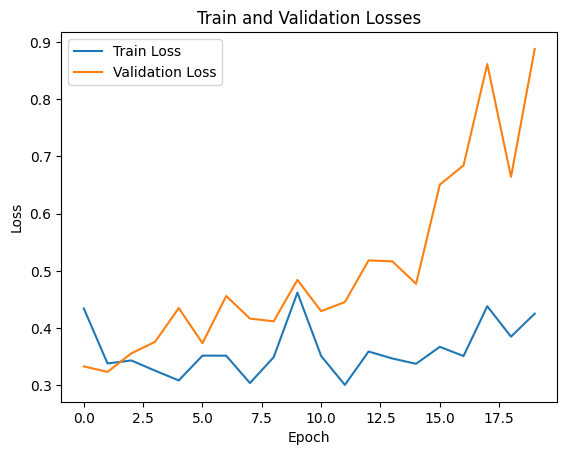

In [31]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Losses')
plt.legend()
plt.show()

**Avaliação do modelo**


In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Test Loss: 1.0862, Test Accuracy: 0.9011


**Matriz de confusão**


313/313 [==============================] - 1s 2ms/step


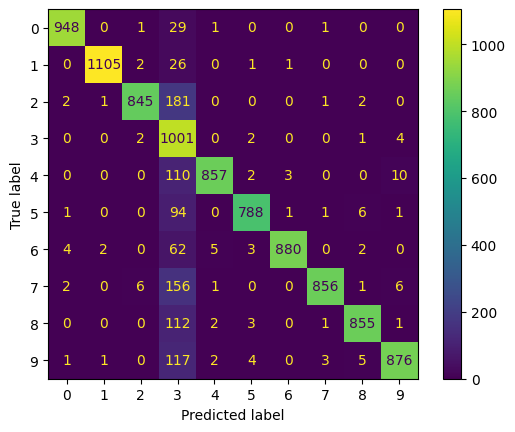

In [33]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()